RESOURCES AND CREDITS TO : </br>
FREECODECAMP: https://youtu.be/FTpmwX94_Yo?si=j64-jlPtn7MiqfzQ </br>
RESOURCES: https://github.com/TatevKaren/CaseStudies/tree/main/AB%20Testing </br>

Look at the pdf (Walk through of AB Testing theory and steps.pdf) to see the steps , walkthrough and explanation  

THIS PROJECT IS DONE BY LUKE YEO: 

this project is mainly done for learning, it is not for copying/pasting code and say that it is mine. 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

<h2> 1) READ THE FILE AND SEE THE DATA</h2>

In [2]:
#read the dataset file
df = pd.read_csv('ab_test_click_data.csv')

In [3]:
#see the top 10 rows of the dataset
df.head(10) 

,user_id,click,group,timestamp
0,1,1,exp,2024-01-01 00:00:00
1,2,0,exp,2024-01-01 00:01:00
2,3,1,exp,2024-01-01 00:02:00
3,4,0,exp,2024-01-01 00:03:00
4,5,1,exp,2024-01-01 00:04:00
5,6,0,exp,2024-01-01 00:05:00
6,7,1,exp,2024-01-01 00:06:00
7,8,1,exp,2024-01-01 00:07:00
8,9,0,exp,2024-01-01 00:08:00
9,10,0,exp,2024-01-01 00:09:00


In [4]:
#describe the dataset in basic statistic value , this is for overall !! not just for 1 specific group
df.describe()

,user_id,click
count,20000.000000,20000.000000
mean,10000.500000,0.405250
std,5773.647028,0.490953
min,1.000000,0.000000
25%,5000.750000,0.000000
50%,10000.500000,0.000000
75%,15000.250000,1.000000
max,20000.000000,1.000000


In [5]:
#get a general info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user_id    20000 non-null  int64 
 1   click      20000 non-null  int64 
 2   group      20000 non-null  object
 3   timestamp  10000 non-null  object
dtypes: int64(2), object(2)
memory usage: 625.1+ KB


<h2> 2) Show a graph of the click distribution between the 2 groups</h2>

In [6]:
df.groupby("group").sum("click")

,user_id,click
group,,
con,150005000,1989
exp,50005000,6116


From this code : we know that both groups are in the dataset 

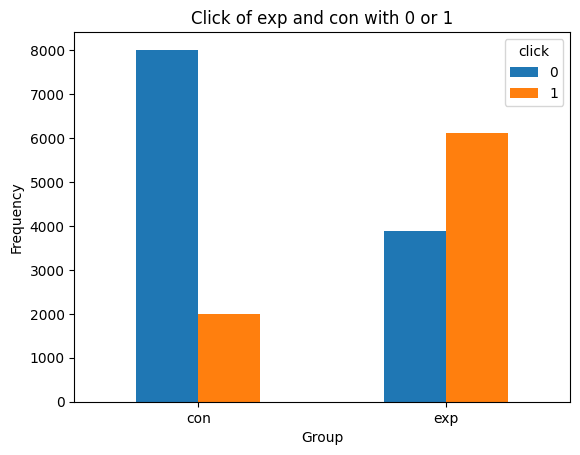

In [7]:
aggregated_data = df.groupby(['group', 'click']).size().unstack(fill_value=0)
aggregated_data.plot(kind='bar', stacked=False)

#0 representing no click , 1 representing click
plt.title('Click of exp and con with 0 or 1')
plt.xlabel('Group')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()


<h2>3) Get more details in regards to the 2 groups </h2>

In [8]:
percentage_data = aggregated_data.div(aggregated_data.sum(axis=1), axis=0) * 100

In [9]:
#getting the percentage of the graph
percentage_data

click,0,1
group,,
con,80.11,19.89
exp,38.84,61.16


In [10]:
group_totals = df['group'].value_counts()
print(group_totals)

exp    10000
con    10000
Name: group, dtype: int64


In [11]:
numb_con =df[df["group"]== "con"].count()
numb_con

user_id      10000
click        10000
group        10000
timestamp        0
dtype: int64

In [12]:
numb_exp =df[df["group"]== "exp"].count()
numb_exp

user_id      10000
click        10000
group        10000
timestamp    10000
dtype: int64

In [13]:
con_click = df.groupby("group")["click"].sum().loc["con"]
con_click

1989

In [14]:
exp_click = df.groupby("group")["click"].sum().loc["exp"]
exp_click

6116

for the 2 numbers, you can check with In[6] , they are the same so thats a good thing

note that the 10000 is the total number of unique for each group (con/exp) , they just happen to be the same number. 

<h2>4) Calculate the Pooled Estimate, Pooled Variance, Pooled Standard Error and Test statistic -> Z critical value

In [15]:
Probability_estimated_clicks_con = con_click/numb_con
Probability_estimated_clicks_con

user_id      0.1989
click        0.1989
group        0.1989
timestamp       inf
dtype: float64

In [16]:
Probability_estimated_clicks_exp = exp_click/numb_exp
Probability_estimated_clicks_exp

user_id      0.6116
click        0.6116
group        0.6116
timestamp    0.6116
dtype: float64

In [17]:
Pooled_Probability_estimated_all = (con_click + exp_click) / (numb_con + numb_exp)
Pooled_Probability_estimated_all

user_id      0.40525
click        0.40525
group        0.40525
timestamp    0.81050
dtype: float64

Notice that the pooled_estimate_all is the mean value 

In [18]:
pooled_variance = Pooled_Probability_estimated_all * (1- Pooled_Probability_estimated_all) * (1/numb_con+ 1/numb_exp)
pooled_variance

user_id      0.000048
click        0.000048
group        0.000048
timestamp         inf
dtype: float64

In [19]:
Standard_error = np.sqrt(pooled_variance)
Standard_error

user_id      0.006943
click        0.006943
group        0.006943
timestamp         inf
dtype: float64

In [20]:
#This is a 2-sample stat-test for Z-test, note , we can use 2-sample T test too !!  
Test_stat = (Probability_estimated_clicks_con - Probability_estimated_clicks_exp)/Standard_error
print(Test_stat)

user_id     -59.441633
click       -59.441633
group       -59.441633
timestamp          NaN
dtype: float64


In [21]:
#critical value for Z-test (standard normal distribution) , why 2 is because we have a 2 sameple 2 sided test 
alpha = 0.05 #set the alpha to 5% (Probability of Type 1 error, Significance Level)
Z_critical_value = norm.ppf(1-alpha/2)
Z_critical_value 

1.959963984540054

59.44 is larger than 1.95 so we know that we can reject the null hypothesis but !! using P-value , it is alot more used , proper way of doing it

<h2>5) Calculate the P-test of the Z-test. </h2>

In [22]:
p_value = 2*norm.sf(abs(-59.441633))
p_value

0.0

In [23]:
alpha = 0.05 #set the alpha to 5% (Probability of Type 1 error, Significance Level)
def is_statistical_significance(p_value, alpha):
    """
    Determines whether a result is statistically significant.

    Parameters:
    p_value (float): The p-value obtained from a statistical test.
    alpha (float): The significance level (e.g., 0.05 for a 5% significance level).

    Returns:
    bool: True if the result is statistically significant, False otherwise.
    """
    if p_value < alpha:
        return print("there is a statistically significant between the groups")
    else:
        return print("there is NO a statistically significant betweem the groups")

    

In [24]:
is_statistical_significance(p_value, alpha)

there is a statistically significant between the groups


This shows that we can reject the null hypothesis ! which shows that there is a true difference between the group 

<h2> 6)Calculate show the confidence interval of the test:</h2>

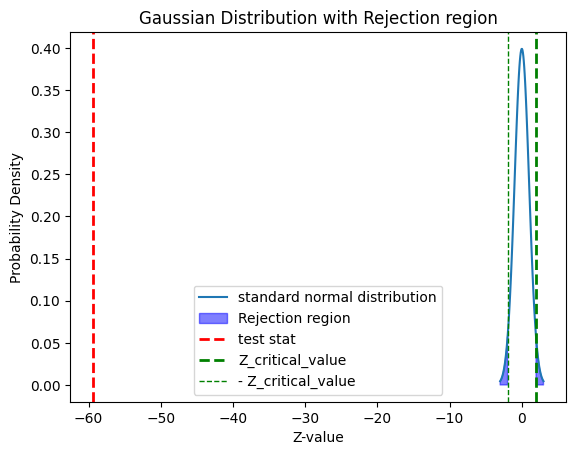

In [25]:
mu = 0 #mean
sigma = 1 #SD
x = np.linspace(mu-3*sigma, mu+3*sigma, 100)
y = norm.pdf(x,mu,sigma)


plt.plot(x,y,label = "standard normal distribution")
plt.fill_between(x,y,where=(x > Z_critical_value) | (x < - Z_critical_value),color='blue',alpha =0.5, label = 'Rejection region') 
# the test strat
plt.axvline(-59.441633, color= 'red', linestyle = 'dashed', linewidth = 2 , label = 'test stat')
# the z critical value
plt.axvline(Z_critical_value, color= 'green', linestyle = 'dashed', linewidth = 2 , label = 'Z_critical_value')
plt.axvline(- Z_critical_value, color= 'green', linestyle = 'dashed', linewidth = 1 , label = '- Z_critical_value')  


plt.xlabel('Z-value')
plt.ylabel('Probability Density')
plt.title('Gaussian Distribution with Rejection region')
plt.legend()
plt.show()

Interpretation of the Graph:
-Extreme Test Statistic: The test statistic is far outside the range of the standard normal distribution, beyond the Z-critical values. This indicates that if the null hypothesis were true, the probability of obtaining such a test statistic would be extremely low.
- Rejecting the Null Hypothesis: Since the test statistic falls well within the rejection region (actually, it is far beyond it), you would reject the null hypothesis with strong evidence against it.

The extreme position of the test statistic suggests that the observed data is very unlikely under the null hypothesis, leading to a rejection of the null hypothesis in favor of the alternative hypothesis.


In [26]:
CI = [
    #1st is for the lower bound, 2nd is for the upper bound, the 3 = 3 decimal place
    abs(round((Probability_estimated_clicks_con - Probability_estimated_clicks_exp)- (Standard_error * Z_critical_value), 3)),
    abs(round((Probability_estimated_clicks_con - Probability_estimated_clicks_exp) + (Standard_error * Z_critical_value), 3))
]

CI

[user_id      0.426
 click        0.426
 group        0.426
 timestamp      NaN
 dtype: float64,
 user_id      0.399
 click        0.399
 group        0.399
 timestamp      inf
 dtype: float64]

In [27]:
delta = 0.1 #set delta to 10% (Minimum Detectable Effect )
def is_practical_significant(delta, CI_95):
    """
    Determines whether the effect size (delta) is practically significant.

    Parameters:
    delta (float): The minimum effect size that is considered practically significant.
    CI_95 (list): A list containing the lower and upper bounds of the 95% confidence interval.

    Returns:
    bool: True if the entire confidence interval is greater than the practical significance threshold (delta), False otherwise.
    """
    lower_bound, upper_bound = CI_95
    
    # Check if the entire confidence interval is above the practical significance threshold (delta)
    if lower_bound <= delta:
        print('there is a practical significance')
        return True
    else:
        print('there is NO a practical significance')
        return False

In [28]:
CI_95 = [0.04, 0.06] 
is_practical_significant(delta, CI_95)

there is a practical significance


True

note : 0.04 = lower bound of the 95% confidence interval